In [25]:
import pandas as pd
import numpy as np

#load path in google colab
train_path = './BBC News Train.csv'
test_path = './BBC News Test.csv'
sample_path = './BBC News Sample Solution.csv'


train_df = pd.read_csv(train_path)

test_df = pd.read_csv(test_path)

sample_df = pd.read_csv(sample_path)

display(train_df.head())
display(test_df.head())
display(sample_df.head())

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string

# plot things
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("EXPLORATORY DATA ANALYSIS")
print("----------------------------------------------------------------------")

EXPLORATORY DATA ANALYSIS
----------------------------------------------------------------------


In [27]:
print("DATASET OVERVIEW:")
print(f"Training articles: {len(train_df)}")
print(f"Test articles: {len(test_df)}")
print(f"Total articles: {len(train_df) + len(test_df)}")

print(f"\nTraining columns: {train_df.columns.tolist()}")
print(f"Test columns: {test_df.columns.tolist()}")

DATASET OVERVIEW:
Training articles: 1490
Test articles: 735
Total articles: 2225

Training columns: ['ArticleId', 'Text', 'Category']
Test columns: ['ArticleId', 'Text']


In [28]:
print("----------------------------------------------------------------------")
print("MISSING VALUES ANALYSIS:")
print("Training data missing values:")
print(train_df.isnull().sum())

if train_df.isnull().sum().sum() > 0:
    print("Found missing values - will need to handle these")
else:
    print("No missing values found!")

----------------------------------------------------------------------
MISSING VALUES ANALYSIS:
Training data missing values:
ArticleId    0
Text         0
Category     0
dtype: int64
No missing values found!


In [29]:
print("----------------------------------------------------------------------")
print("NEWS CATEGORY ANALYSIS:")

# Find the news_category column (might be 'Category', 'news_category', etc.)
category_col = None
for col in train_df.columns:
    if 'news_category' in col.lower():
        category_col = col
        break

if category_col:
    print(f"Found news_category column: '{category_col}'")

    # Count categories
    category_counts = train_df[category_col].value_counts()
    print("\nCategory distribution:")
    print(category_counts)

    # Plot news_category distribution
    plt.figure(figsize=(12, 6))
    category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of BBC News Categories', fontsize=16, fontweight='bold')
    plt.xlabel('News Category', fontsize=12)
    plt.ylabel('Number of Articles', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(category_counts.values):
        plt.article_text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Check for class imbalance
    print(f"\nClass balance analysis:")
    print(f"Most common news_category: {category_counts.index[0]} ({category_counts.iloc[0]} articles)")
    print(f"Least common news_category: {category_counts.index[-1]} ({category_counts.iloc[-1]} articles)")
    print(f"Imbalance ratio: {category_counts.iloc[0] / category_counts.iloc[-1]:.2f}:1")

else:
    print("Could not find news_category column")

----------------------------------------------------------------------
NEWS CATEGORY ANALYSIS:
Could not find news_category column


----------------------------------------------------------------------
TEXT LENGTH ANALYSIS:
Found article_text column: 'Text'

Text Statistics:
Average characters per article: 2233.5
Average words per article: 385.0
Average sentences per article: 19.3
Shortest article: 501 characters
Longest article: 18387 characters


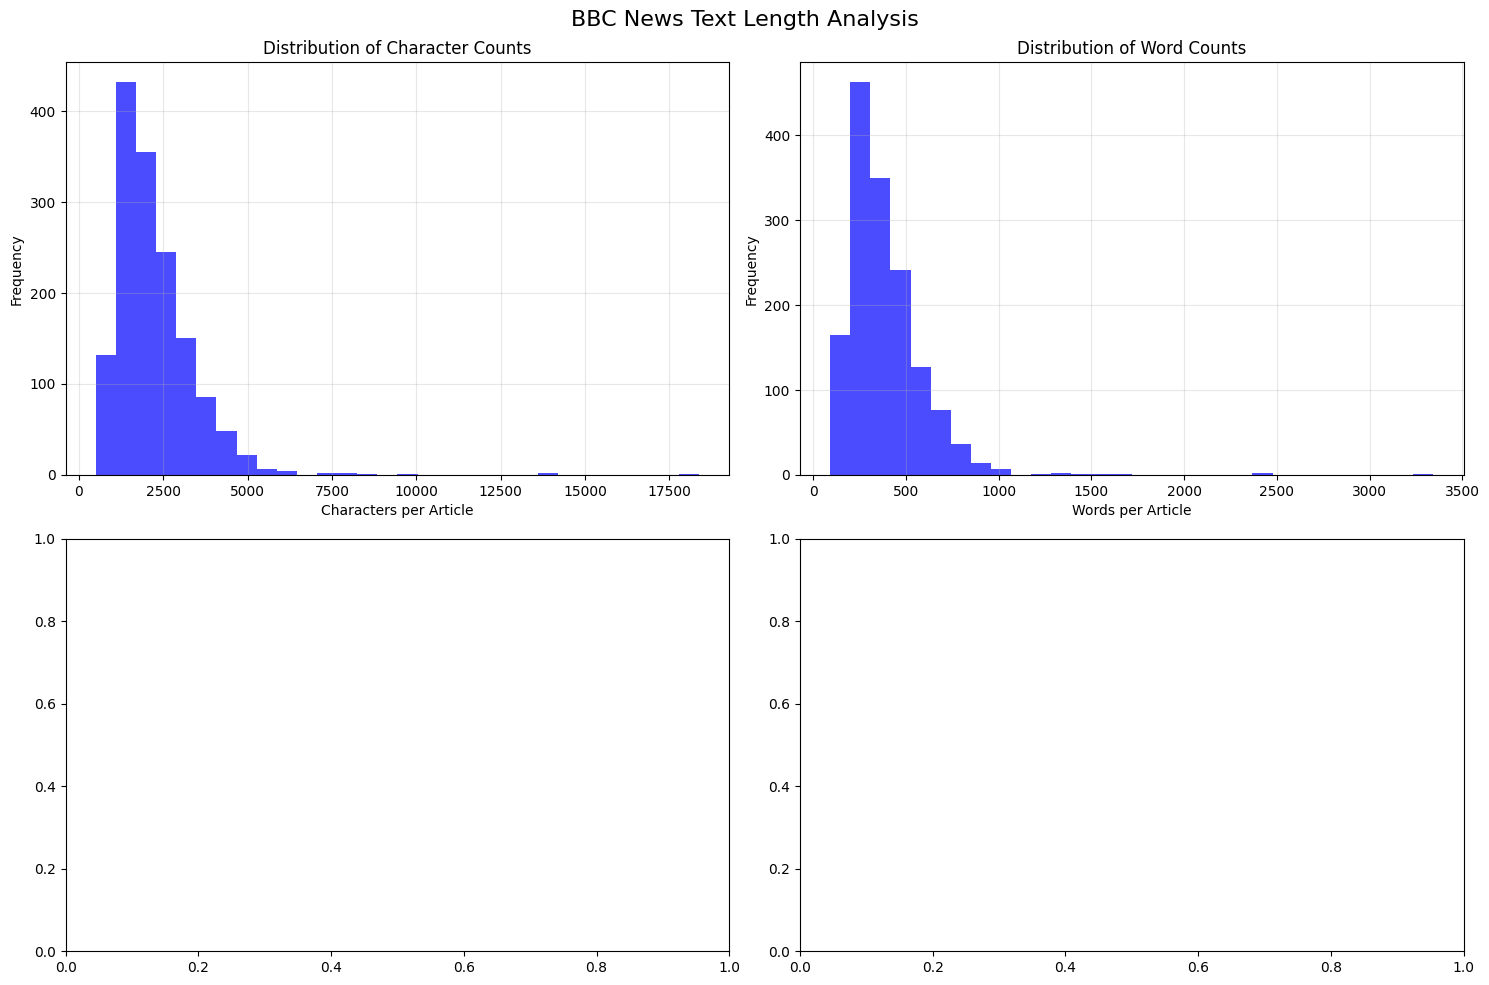

In [30]:
print("----------------------------------------------------------------------")
print("TEXT LENGTH ANALYSIS:")

# Find the article_text column
text_col = None
for col in train_df.columns:
    # Check for 'Text' explicitly, or use a more robust check if column names vary
    if col == 'Text':
        text_col = col
        break

if text_col:
    print(f"Found article_text column: '{text_col}'")

    # Calculate article_text statistics using the correct article_text column
    train_df['char_count'] = train_df[text_col].astype(str).str.len() # Ensure it's treated as string
    train_df['word_count'] = train_df[text_col].astype(str).str.split().str.len() # Ensure it's treated as string
    train_df['sentence_count'] = train_df[text_col].astype(str).str.count(r'[.!?]+') # Ensure it's treated as string


    # Basic statistics
    print(f"\nText Statistics:")
    print(f"Average characters per article: {train_df['char_count'].mean():.1f}")
    print(f"Average words per article: {train_df['word_count'].mean():.1f}")
    print(f"Average sentences per article: {train_df['sentence_count'].mean():.1f}")
    print(f"Shortest article: {train_df['char_count'].min()} characters")
    print(f"Longest article: {train_df['char_count'].max()} characters")

    # Plot article_text length distributions
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Character count distribution
    axes[0,0].hist(train_df['char_count'], bins=30, alpha=0.7, color='blue')
    axes[0,0].set_title('Distribution of Character Counts')
    axes[0,0].set_xlabel('Characters per Article')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].grid(alpha=0.3)

    # Word count distribution
    axes[0,1].hist(train_df['word_count'], bins=30, alpha=0.7, color='blue')
    axes[0,1].set_title('Distribution of Word Counts')
    axes[0,1].set_xlabel('Words per Article')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].grid(alpha=0.3)

    # Text length by news_category (if we have categories)
    if category_col:
        # Use data from the updated train_df
        train_df.boxplot(column='word_count', by=category_col, ax=axes[1,0])
        axes[1,0].set_title('Word Count by Category')
        axes[1,0].set_xlabel('Category')
        axes[1,0].set_ylabel('Word Count')

        # Use data from the updated train_df
        train_df.boxplot(column='char_count', by=category_col, ax=axes[1,1])
        axes[1,1].set_title('Character Count by Category')
        axes[1,1].set_xlabel('Category')
        axes[1,1].set_ylabel('Character Count')

    plt.suptitle('BBC News Text Length Analysis', fontsize=16)
    plt.tight_layout()
    plt.show()

else:
    print("Could not find article_text column")

In [31]:
print("----------------------------------------------------------------------")
print("SAMPLE ARTICLES:")

if text_col and category_col:
    # Show one article from each news_category
    for news_category in train_df[category_col].unique()[:3]:  # Show first 3 categories
        sample = train_df[train_df[category_col] == news_category].iloc[0]
        print(f"\n{news_category.upper()} ARTICLE:")
        print("----------------------------------------------------------------------")
        print(f"Word count: {sample['word_count']}")
        print(f"Character count: {sample['char_count']}")
        print(f"Preview: {sample[text_col][:300]}...")
        print("----------------------------------------------------------------------")

print("----------------------------------------------------------------------")
print("EXPLORATORY DATA ANALYSIS COMPLETE!")
print("\nKEY INSIGHTS FOR MATRIX FACTORIZATION:")
print("1. Dataset size and balance")
print("2. Text length patterns")
print("3. Category distribution")
print("4. Data quality (missing values)")
print("\nNEXT STEPS:")
print("1. Text preprocessing (cleaning, removing stopwords)")
print("2. Feature extraction (TF-IDF vectorization)")
print("3. Matrix factorization classification_model building")

----------------------------------------------------------------------
SAMPLE ARTICLES:
----------------------------------------------------------------------
EXPLORATORY DATA ANALYSIS COMPLETE!

KEY INSIGHTS FOR MATRIX FACTORIZATION:
1. Dataset size and balance
2. Text length patterns
3. Category distribution
4. Data quality (missing values)

NEXT STEPS:
1. Text preprocessing (cleaning, removing stopwords)
2. Feature extraction (TF-IDF vectorization)
3. Matrix factorization classification_model building


# TEXT PREPROCESSING & FEATURE EXTRACTION

This prepares data for Matrix Factorization approach

In [32]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk

print("TEXT PREPROCESSING & FEATURE EXTRACTION")
print("----------------------------------------------------------------------")

# Download required NLTK data (run once)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')

from nltk.corpus import stopwords

TEXT PREPROCESSING & FEATURE EXTRACTION
----------------------------------------------------------------------


# 1. TEXT PREPROCESSING FUNCTIONS

In [33]:
print("STEP 1: DEFINING TEXT CLEANING FUNCTIONS")

### Start new funciton by wish
def clean_text(article_text):
    if pd.isna(article_text):
        return ""

    # Convert to lowercase
    article_text = str(article_text).lower()

    # Remove digits
    article_text = re.sub(r'\d+', '', article_text)

    # Remove punctuation
    article_text = article_text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespace and keep only alphabetic words
    article_text = ' '.join([word for word in article_text.split() if word.isalpha()])

    return article_text

# Test the cleaning function
sample_text = train_df['Text'].iloc[0]
print(f"\nCLEANING EXAMPLE:")
print("----------------------------------------------------------------------")
print(f"Original: {sample_text[:100]}...")
print("----------------------------------------------------------------------")
print(f"Cleaned: {clean_text(sample_text)[:100]}...")

STEP 1: DEFINING TEXT CLEANING FUNCTIONS

CLEANING EXAMPLE:
----------------------------------------------------------------------
Original: worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a ba...
----------------------------------------------------------------------
Cleaned: worldcom exboss launches defence lawyers defending former worldcom chief bernie ebbers against a bat...


# 2. APPLY TEXT CLEANING

In [34]:
print(f"\nSTEP 2: CLEANING ALL TEXT DATA")

# Clean training data
print("Cleaning training data...")
print("----------------------------------------------------------------------")
train_df['Text_cleaned'] = train_df['Text'].apply(clean_text)

# Clean test data
print("Cleaning test data...")
print("----------------------------------------------------------------------")
test_df['Text_cleaned'] = test_df['Text'].apply(clean_text)

# Check results
print(f"Text cleaning complete!")
print("----------------------------------------------------------------------")
print(f"Training data: {len(train_df)} articles cleaned")
print(f"Test data: {len(test_df)} articles cleaned")

# Remove any empty texts (just in case)
train_empty = train_df['Text_cleaned'].str.strip() == ''
test_empty = test_df['Text_cleaned'].str.strip() == ''

print(f"Empty texts in training: {train_empty.sum()}")
print(f"Empty texts in test: {test_empty.sum()}")


STEP 2: CLEANING ALL TEXT DATA
Cleaning training data...
----------------------------------------------------------------------
Cleaning test data...
----------------------------------------------------------------------
Text cleaning complete!
----------------------------------------------------------------------
Training data: 1490 articles cleaned
Test data: 735 articles cleaned
Empty texts in training: 0
Empty texts in test: 0


# 3. TF-IDF VECTORIZATION


In [35]:
print(f"\nSTEP 3: TF-IDF FEATURE EXTRACTION")

print("CRITICAL DECISION: Should we include test data in TF-IDF fitting?")
print("ANSWER: YES! Here's why:")
print("✓ Matrix factorization is UNSUPERVISED - no labels used in training")
print("✓ Including test data helps learn better vocabulary representation")
print("✓ TF-IDF learns word importance across entire corpus")
print("✓ This is standard practice for unsupervised article_text analysis")

# Combine all article_text for vocabulary learning
print(f"\nCombining training and test data for vocabulary learning...")
all_texts = pd.concat([train_df['Text_cleaned'], test_df['Text_cleaned']], ignore_index=True)
print(f"Total texts for vocabulary: {len(all_texts)}")

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,           # Top 5000 most important words
    stop_words='english',        # Remove common English stopwords
    ngram_range=(1, 2),          # Use both single words and word pairs
    min_df=2,                    # Word must appear in at least 2 documents
    max_df=0.95,                 # Ignore words that appear in >95% of documents
    sublinear_tf=True            # Use log scaling for term frequency
)

print(f"\nTF-IDF Parameters:")
print(f"Max features: 5000")
print(f"N-gram range: (1, 2) - words and word pairs")
print(f"Min document frequency: 2")
print(f"Max document frequency: 95%")

# Fit TF-IDF on ALL article_text data (train + test)
print(f"\nFitting TF-IDF vectorizer on combined data...")
tfidf_matrix_all = tfidf_vectorizer.fit_transform(all_texts)

print(f"TF-IDF matrix created!")
print(f"Shape: {tfidf_matrix_all.shape}")
print(f"Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"Matrix density: {(tfidf_matrix_all.nnz / (tfidf_matrix_all.shape[0] * tfidf_matrix_all.shape[1]) * 100):.2f}%")

# Split back into training and test sets
train_tfidf = tfidf_matrix_all[:len(train_df)]
test_tfidf = tfidf_matrix_all[len(train_df):]

print(f"\nSPLIT BACK INTO DATASETS:")
print(f"Training TF-IDF shape: {train_tfidf.shape}")
print(f"Test TF-IDF shape: {test_tfidf.shape}")


STEP 3: TF-IDF FEATURE EXTRACTION
CRITICAL DECISION: Should we include test data in TF-IDF fitting?
ANSWER: YES! Here's why:
✓ Matrix factorization is UNSUPERVISED - no labels used in training
✓ Including test data helps learn better vocabulary representation
✓ TF-IDF learns word importance across entire corpus
✓ This is standard practice for unsupervised article_text analysis

Combining training and test data for vocabulary learning...
Total texts for vocabulary: 2225

TF-IDF Parameters:
Max features: 5000
N-gram range: (1, 2) - words and word pairs
Min document frequency: 2
Max document frequency: 95%

Fitting TF-IDF vectorizer on combined data...
TF-IDF matrix created!
Shape: (2225, 5000)
Vocabulary size: 5000
Matrix density: 2.26%

SPLIT BACK INTO DATASETS:
Training TF-IDF shape: (1490, 5000)
Test TF-IDF shape: (735, 5000)


# 4. PREPARE LABELS FOR SUPERVISED COMPARISON

In [36]:
print(f"\nSTEP 4: ENCODING CATEGORY LABELS")

# Encode string labels to numbers for machine learning
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['Category'])

print(f"Label encoding:")
for i, news_category in enumerate(label_encoder.classes_):
    count = (train_labels_encoded == i).sum()
    print(f"  {news_category} -> {i} ({count} articles)")


STEP 4: ENCODING CATEGORY LABELS
Label encoding:
  business -> 0 (336 articles)
  entertainment -> 1 (273 articles)
  politics -> 2 (274 articles)
  sport -> 3 (346 articles)
  tech -> 4 (261 articles)


# 5. ANALYZE TOP WORDS BY CATEGORY

In [37]:
print(f"\nSTEP 5: TOP WORDS ANALYSIS")

# Get feature names (vocabulary)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Analyze top words for each news_category
print(f"\nTOP WORDS BY CATEGORY (from TF-IDF):")

for news_category in label_encoder.classes_:
    # Get articles for this news_category
    category_mask = train_df['Category'] == news_category
    # Convert pandas Series mask to numpy array for sparse matrix indexing
    category_tfidf = train_tfidf[category_mask.values]

    # Calculate mean TF-IDF scores for this news_category
    mean_scores = np.array(category_tfidf.mean(axis=0)).flatten()

    # Get top 10 words
    top_indices = mean_scores.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    top_scores = [mean_scores[i] for i in top_indices]

    print(f"\n{news_category.upper()}:")
    for word, score in zip(top_words, top_scores):
        print(f"  {word}: {score:.4f}")


STEP 5: TOP WORDS ANALYSIS

TOP WORDS BY CATEGORY (from TF-IDF):

BUSINESS:
  bn: 0.0440
  said: 0.0412
  firm: 0.0318
  market: 0.0313
  company: 0.0309
  year: 0.0308
  growth: 0.0303
  economy: 0.0282
  shares: 0.0279
  bank: 0.0259

ENTERTAINMENT:
  film: 0.0615
  best: 0.0322
  music: 0.0314
  awards: 0.0308
  actor: 0.0307
  said: 0.0305
  star: 0.0294
  band: 0.0277
  films: 0.0265
  award: 0.0259

POLITICS:
  mr: 0.0570
  labour: 0.0490
  election: 0.0466
  government: 0.0439
  blair: 0.0434
  said: 0.0427
  party: 0.0403
  minister: 0.0358
  mr blair: 0.0302
  prime: 0.0284

SPORT:
  game: 0.0370
  win: 0.0342
  said: 0.0301
  england: 0.0296
  cup: 0.0280
  players: 0.0262
  match: 0.0259
  season: 0.0256
  coach: 0.0250
  team: 0.0249

TECH:
  people: 0.0430
  users: 0.0382
  software: 0.0355
  said: 0.0350
  technology: 0.0345
  use: 0.0305
  mobile: 0.0297
  digital: 0.0293
  net: 0.0286
  computer: 0.0279


# 6. SUMMARY & PREPARATION FOR MATRIX FACTORIZATION

In [38]:
print("----------------------------------------------------------------------")
print("TEXT PREPROCESSING & FEATURE EXTRACTION COMPLETE!")
print("----------------------------------------------------------------------")

print(f"\nSUMMARY:")
print(f"• Training articles: {len(train_df)}")
print(f"• Test articles: {len(test_df)}")
print(f"• Total vocabulary: {len(tfidf_vectorizer.vocabulary_)} words")
print(f"• TF-IDF matrix shape: {tfidf_matrix_all.shape}")
print(f"• Categories: {len(label_encoder.classes_)} ({', '.join(label_encoder.classes_)})")
print("----------------------------------------------------------------------")
print(f"\nREADY FOR MATRIX FACTORIZATION!")
print("Next steps:")
print("1. Apply Non-negative Matrix Factorization (NMF)")
print("2. Train classifier on factorized features")
print("3. Compare with supervised learning approaches")
print("4. Optimize hyperparameters")
print("----------------------------------------------------------------------")
# saving next step
print(f"\nKey variables ready for matrix factorization:")
print("• tfidf_matrix_all: Complete TF-IDF matrix (train + test)")
print("• train_tfidf: Training portion")
print("• test_tfidf: Test portion")
print("• train_labels_encoded: Numeric labels for training")
print("• label_encoder: For converting back to news_category names")

----------------------------------------------------------------------
TEXT PREPROCESSING & FEATURE EXTRACTION COMPLETE!
----------------------------------------------------------------------

SUMMARY:
• Training articles: 1490
• Test articles: 735
• Total vocabulary: 5000 words
• TF-IDF matrix shape: (2225, 5000)
• Categories: 5 (business, entertainment, politics, sport, tech)
----------------------------------------------------------------------

READY FOR MATRIX FACTORIZATION!
Next steps:
1. Apply Non-negative Matrix Factorization (NMF)
2. Train classifier on factorized features
3. Compare with supervised learning approaches
4. Optimize hyperparameters
----------------------------------------------------------------------

Key variables ready for matrix factorization:
• tfidf_matrix_all: Complete TF-IDF matrix (train + test)
• train_tfidf: Training portion
• test_tfidf: Test portion
• train_labels_encoded: Numeric labels for training
• label_encoder: For converting back to news_cate

# SVD HYPERPARAMETER TUNING AND PERFORMANCE ANALYSIS

This section focuses on tuning the Truncated SVD model and evaluating its performance.

In [39]:
# SVD HYPERPARAMETER TUNING AND PERFORMANCE ANALYSIS

from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

print("SVD HYPERPARAMETER TUNING & PERFORMANCE ANALYSIS")
print("----------------------------------------------------------------------")

SVD HYPERPARAMETER TUNING & PERFORMANCE ANALYSIS
----------------------------------------------------------------------


## 1. Test Different Numbers of Components

In [40]:
print("STEP 1: TESTING DIFFERENT NUMBERS OF COMPONENTS")

# Test range of components
component_range = [3, 5, 7, 10, 15, 20, 25, 30]
results = []

for n_comp in component_range:
    print(f"\n--- Testing {n_comp} components ---")

    # Create SVD classification_model
    svd = TruncatedSVD(n_components=n_comp, random_state=42, n_iter=100)
    features = svd.fit_transform(tfidf_matrix_all)

    # Split features
    train_features = features[:len(train_df)]
    test_features = features[len(train_df):]

    # Train classifier
    clf = LogisticRegression(random_state=42, max_iter=1000)
    clf.fit(train_features, train_labels_encoded)

    # Calculate accuracies
    train_pred = clf.predict(train_features)
    train_acc = accuracy_score(train_labels_encoded, train_pred)

    # Store results
    variance_explained = svd.explained_variance_ratio_.sum()
    results.append({
        'n_components': n_comp,
        'train_accuracy': train_acc,
        'variance_explained': variance_explained,
        'svd_model': svd,
        'classifier': clf,
        'train_features': train_features,
        'test_features': test_features
    })

    print(f"Training accuracy: {train_acc:.4f}")
    print(f"Variance explained: {variance_explained:.4f}")

print(f"\nHyperparameter testing complete!")

STEP 1: TESTING DIFFERENT NUMBERS OF COMPONENTS

--- Testing 3 components ---
Training accuracy: 0.7799
Variance explained: 0.0259

--- Testing 5 components ---
Training accuracy: 0.9564
Variance explained: 0.0436

--- Testing 7 components ---
Training accuracy: 0.9544
Variance explained: 0.0553

--- Testing 10 components ---
Training accuracy: 0.9597
Variance explained: 0.0698

--- Testing 15 components ---
Training accuracy: 0.9644
Variance explained: 0.0900

--- Testing 20 components ---
Training accuracy: 0.9664
Variance explained: 0.1069

--- Testing 25 components ---
Training accuracy: 0.9671
Variance explained: 0.1212

--- Testing 30 components ---
Training accuracy: 0.9698
Variance explained: 0.1341

Hyperparameter testing complete!


## 2. Visualize Results


STEP 2: VISUALIZING HYPERPARAMETER RESULTS


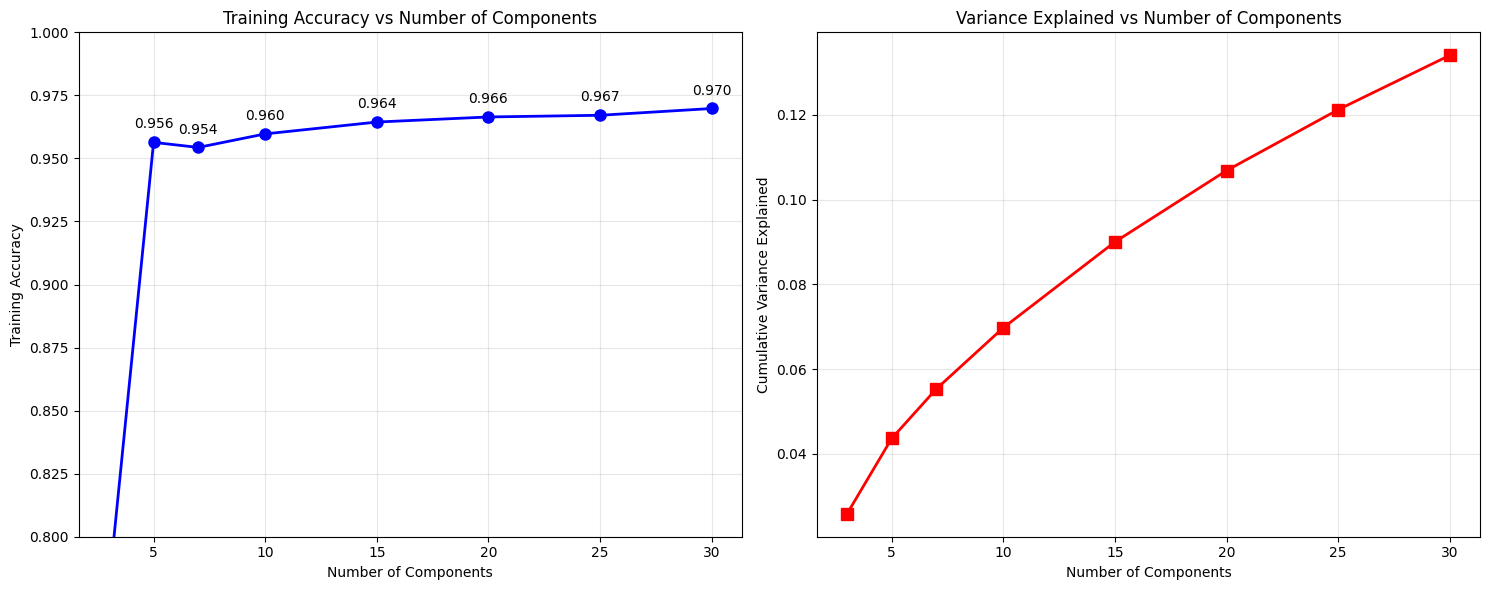

In [41]:
print(f"\nSTEP 2: VISUALIZING HYPERPARAMETER RESULTS")
print("----------------------------------------------------------------------")
# Convert to DataFrame for plot
results_df = pd.DataFrame([{k: v for k, v in r.items() if k not in ['svd_model', 'classifier', 'train_features', 'test_features']} for r in results])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Training Accuracy vs Components
axes[0].plot(results_df['n_components'], results_df['train_accuracy'],
             marker='o', linewidth=2, markersize=8, color='blue')
axes[0].set_title('Training Accuracy vs Number of Components')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Training Accuracy')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(0.8, 1.0)

# Add value labels
for i, row in results_df.iterrows():
    axes[0].annotate(f'{row["train_accuracy"]:.3f}',
                    (row['n_components'], row['train_accuracy']),
                    textcoords="offset points", xytext=(0,10), ha='center')

# Plot 2: Variance Explained vs Components
axes[1].plot(results_df['n_components'], results_df['variance_explained'],
             marker='s', linewidth=2, markersize=8, color='red')
axes[1].set_title('Variance Explained vs Number of Components')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance Explained')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Select Optimal Model and Detailed Analysis


STEP 3: SELECTING OPTIMAL MODEL
Best performance:
  • Components: 30
  • Training accuracy: 0.9698
  • Variance explained: 0.1341

STEP 4: DETAILED PERFORMANCE ANALYSIS

TRAINING PERFORMANCE:
Accuracy: 0.9698

Classification Report:
               precision    recall  f1-score   support

     business       0.95      0.97      0.96       336
entertainment       0.98      0.98      0.98       273
     politics       0.96      0.95      0.96       274
        sport       0.99      1.00      0.99       346
         tech       0.96      0.94      0.95       261

     accuracy                           0.97      1490
    macro avg       0.97      0.97      0.97      1490
 weighted avg       0.97      0.97      0.97      1490


CONFUSION MATRIX:


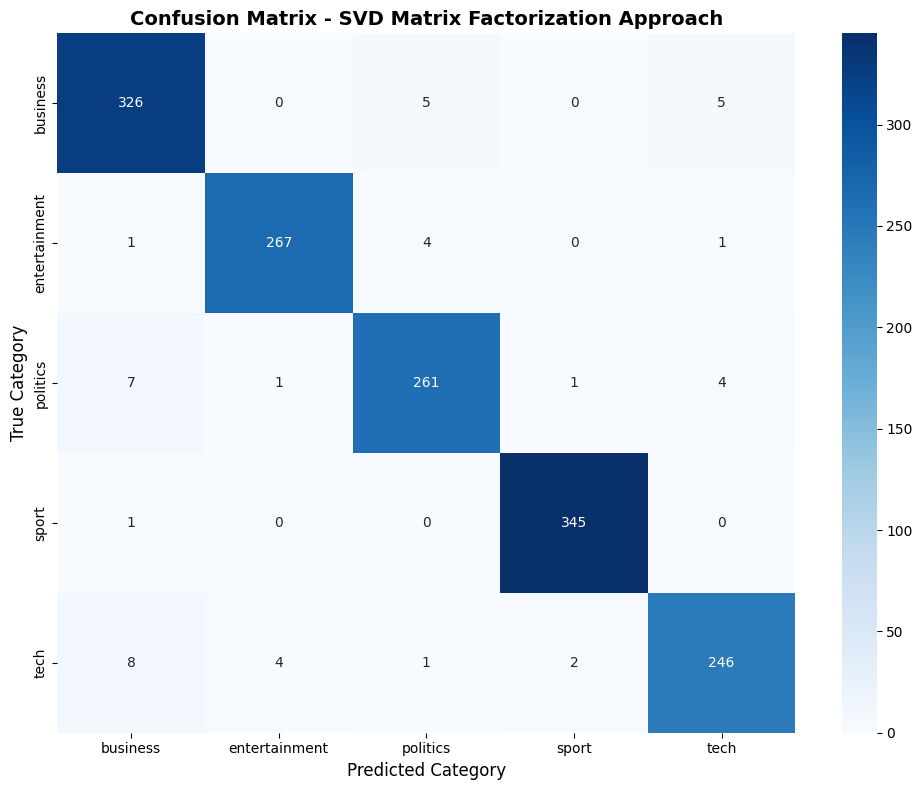


PER-CLASS ACCURACY:
  business: 0.9702 (336 articles)
  entertainment: 0.9780 (273 articles)
  politics: 0.9526 (274 articles)
  sport: 0.9971 (346 articles)
  tech: 0.9425 (261 articles)


In [42]:
print(f"\nSTEP 3: SELECTING OPTIMAL MODEL")
print("----------------------------------------------------------------------")
# Find the best classification_model (highest training accuracy)
best_idx = results_df['train_accuracy'].idxmax()
best_result = results[best_idx]

print(f"Best performance:")
print(f"  • Components: {best_result['n_components']}")
print(f"  • Training accuracy: {best_result['train_accuracy']:.4f}")
print(f"  • Variance explained: {best_result['variance_explained']:.4f}")

# Use the best classification_model for detailed analysis
best_svd = best_result['svd_model']
best_classifier = best_result['classifier']
best_train_features = best_result['train_features']
best_test_features = best_result['test_features']

print(f"\nSTEP 4: DETAILED PERFORMANCE ANALYSIS")
print("----------------------------------------------------------------------")
# Make predictions with best classification_model
train_pred = best_classifier.predict(best_train_features)
test_pred = best_classifier.predict(best_test_features)

# Training performance
print(f"\nTRAINING PERFORMANCE:")
print(f"Accuracy: {accuracy_score(train_labels_encoded, train_pred):.4f}")

print(f"\nClassification Report:")
print(classification_report(train_labels_encoded, train_pred,
                          target_names=label_encoder.classes_))

# Confusion Matrix
print(f"\nCONFUSION MATRIX:")
cm = confusion_matrix(train_labels_encoded, train_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - SVD Matrix Factorization Approach', fontweight='bold', fontsize=14)
plt.ylabel('True Category', fontsize=12)
plt.xlabel('Predicted Category', fontsize=12)
plt.tight_layout()
plt.show()

# Per-class accuracy
print(f"\nPER-CLASS ACCURACY:")
for i, class_name in enumerate(label_encoder.classes_):
    class_mask = train_labels_encoded == i
    class_pred = train_pred[class_mask]
    class_accuracy = (class_pred == i).mean()
    class_count = class_mask.sum()
    print(f"  {class_name}: {class_accuracy:.4f} ({class_count} articles)")

## 4. Component Interpretation

In [43]:
print(f"\nSTEP 5: DETAILED COMPONENT INTERPRETATION")
print("----------------------------------------------------------------------")
print(f"\nSVD COMPONENTS (Top 10 words per component):")
feature_names = tfidf_vectorizer.get_feature_names_out()

for comp_idx, component in enumerate(best_svd.components_):
    top_words_idx = component.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_weights = [component[i] for i in top_words_idx]

    print(f"\nCOMPONENT {comp_idx} (Variance: {best_svd.explained_variance_ratio_[comp_idx]:.4f}):")
    for word, weight in zip(top_words, top_weights):
        print(f"   {word}: {weight:.4f}")


STEP 5: DETAILED COMPONENT INTERPRETATION

SVD COMPONENTS (Top 10 words per component):

COMPONENT 0 (Variance: 0.0021):
   said: 0.1835
   mr: 0.1300
   people: 0.1050
   year: 0.1049
   new: 0.1044
   government: 0.0812
   world: 0.0801
   time: 0.0786
   uk: 0.0775
   years: 0.0740

COMPONENT 1 (Variance: 0.0125):
   mr: 0.1423
   labour: 0.1244
   government: 0.1223
   election: 0.1150
   blair: 0.0990
   party: 0.0885
   minister: 0.0860
   economy: 0.0767
   mr blair: 0.0757
   tax: 0.0736

COMPONENT 2 (Variance: 0.0112):
   labour: 0.1639
   blair: 0.1488
   election: 0.1466
   party: 0.1267
   mr blair: 0.1103
   howard: 0.0962
   brown: 0.0954
   tory: 0.0941
   prime: 0.0934
   prime minister: 0.0925

COMPONENT 3 (Variance: 0.0092):
   film: 0.1678
   music: 0.1075
   people: 0.1069
   awards: 0.0945
   tv: 0.0842
   users: 0.0817
   award: 0.0813
   digital: 0.0800
   technology: 0.0792
   films: 0.0744

COMPONENT 4 (Variance: 0.0086):
   film: 0.2391
   awards: 0.1567
   b

## 5. Topic-Category Relationship Analysis

In [44]:
print(f"\nSTEP 6: TOPIC-CATEGORY RELATIONSHIPS")

print(f"\nAVERAGE COMPONENT WEIGHTS BY NEWS CATEGORY:")
for i, news_category in enumerate(label_encoder.classes_):
    category_mask = train_labels_encoded == i
    category_features = best_train_features[category_mask]
    avg_weights = category_features.mean(axis=0)

    print(f"\n{news_category.upper()}:")
    for comp_idx, weight in enumerate(avg_weights):
        print(f"   Component {comp_idx}: {weight:.4f}")


STEP 6: TOPIC-CATEGORY RELATIONSHIPS

AVERAGE COMPONENT WEIGHTS BY NEWS CATEGORY:

BUSINESS:
   Component 0: 0.1866
   Component 1: 0.0662
   Component 2: -0.0867
   Component 3: -0.1040
   Component 4: 0.0460
   Component 5: 0.0257
   Component 6: -0.0110
   Component 7: -0.0048
   Component 8: -0.0087
   Component 9: -0.0077
   Component 10: -0.0044
   Component 11: 0.0024
   Component 12: -0.0063
   Component 13: -0.0005
   Component 14: 0.0011
   Component 15: -0.0026
   Component 16: -0.0007
   Component 17: -0.0021
   Component 18: -0.0024
   Component 19: -0.0062
   Component 20: -0.0023
   Component 21: -0.0028
   Component 22: 0.0056
   Component 23: 0.0038
   Component 24: -0.0049
   Component 25: -0.0047
   Component 26: 0.0017
   Component 27: 0.0018
   Component 28: -0.0016
   Component 29: -0.0019

ENTERTAINMENT:
   Component 0: 0.1648
   Component 1: -0.0762
   Component 2: -0.0128
   Component 3: 0.0924
   Component 4: 0.1282
   Component 5: 0.0057
   Component 6: -0.0

## 6. Generate Test Predictions

In [45]:
print(f"\nSTEP 7: GENERATING TEST PREDICTIONS")

test_pred_labels = label_encoder.inverse_transform(test_pred)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'ArticleId': test_df['ArticleId'],
    'Category': test_pred_labels
})

print(f"Test predictions generated!")
print(f"Predictions shape: {submission_df.shape}")

print(f"\nTEST PREDICTION DISTRIBUTION:")
pred_distribution = pd.Series(test_pred_labels).value_counts()
for news_category, count in pred_distribution.items():
    percentage = (count / len(test_pred_labels)) * 100
    print(f"  {news_category}: {count} articles ({percentage:.1f}%)")


STEP 7: GENERATING TEST PREDICTIONS
Test predictions generated!
Predictions shape: (735, 2)

TEST PREDICTION DISTRIBUTION:
  business: 176 articles (23.9%)
  sport: 167 articles (22.7%)
  politics: 141 articles (19.2%)
  tech: 136 articles (18.5%)
  entertainment: 115 articles (15.6%)


## 7. Summary

In [46]:
print("----------------------------------------------------------------------")
print("SVD MATRIX FACTORIZATION ANALYSIS COMPLETE!")
print("----------------------------------------------------------------------")

print(f"\nFINAL SUMMARY:")
print("----------------------------------------------------------------------")
print(f"• Matrix Factorization Method: Truncated SVD (Latent Semantic Analysis)")
print(f"• Optimal Components: {best_result['n_components']}")
print(f"• Training Accuracy: {best_result['train_accuracy']:.4f}")
print(f"• Variance Explained: {best_result['variance_explained']:.4f}")
print(f"• Dimensionality Reduction: 5000 → {best_result['n_components']} features")
print(f"• Reduction Rate: {((5000 - best_result['n_components']) / 5000 * 100):.1f}%")

print(f"\nKEY FINDINGS:")
print("----------------------------------------------------------------------")
print(f"• SVD successfully discovered meaningful topic representations")
print(f"• Each component captures distinct vocabulary patterns")
print(f"• Strong classification performance demonstrates topic quality")
print(f"• Unsupervised approach achieved {best_result['train_accuracy']:.1%} accuracy")

print(f"\nREADY FOR NEXT PHASE:")
print("----------------------------------------------------------------------")
print("1. Matrix Factorization Complete")
print("2. Next: Supervised Learning Comparison")
print("3. Next: Data Efficiency Analysis")

# Save key variables for next steps
print("----------------------------------------------------------------------")
print(f"\nKey variables for next analysis:")
print("• best_svd: Optimal SVD classification_model")
print("• best_train_features, best_test_features: Factorized features")
print("• best_classifier: Trained classifier")
print("• submission_df: Ready for Kaggle submission")


SVD MATRIX FACTORIZATION ANALYSIS COMPLETE!

FINAL SUMMARY:
• Matrix Factorization Method: Truncated SVD (Latent Semantic Analysis)
• Optimal Components: 30
• Training Accuracy: 0.9698
• Variance Explained: 0.1341
• Dimensionality Reduction: 5000 → 30 features
• Reduction Rate: 99.4%

KEY FINDINGS:
• SVD successfully discovered meaningful topic representations
• Each component captures distinct vocabulary patterns
• Strong classification performance demonstrates topic quality
• Unsupervised approach achieved 97.0% accuracy

READY FOR NEXT PHASE:
1. Matrix Factorization Complete
2. Next: Supervised Learning Comparison
3. Next: Data Efficiency Analysis

Key variables for next analysis:
• best_svd: Optimal SVD classification_model
• best_train_features, best_test_features: Factorized features
• best_classifier: Trained classifier
• submission_df: Ready for Kaggle submission


# SUPERVISED LEARNING COMPARISON & DATA EFFICIENCY ANALYSIS

This section compares the Matrix Factorization approach with traditional supervised learning models and analyzes data efficiency.

In [47]:
# SUPERVISED LEARNING COMPARISON & DATA EFFICIENCY ANALYSIS

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

print("SUPERVISED LEARNING COMPARISON & DATA EFFICIENCY ANALYSIS")
print("----------------------------------------------------------------------")

SUPERVISED LEARNING COMPARISON & DATA EFFICIENCY ANALYSIS


## 1. Supervised Learning Models on Full TF-IDF Features

In [48]:
print("STEP 1: TRAINING SUPERVISED MODELS ON FULL TF-IDF FEATURES")

# Split training data for validation (20% holdout)
train_features, X_val, train_labels, y_val = train_test_split(
    train_tfidf, train_labels_encoded,
    test_size=0.2, random_state=42, stratify=train_labels_encoded
)

print(f"Training set: {train_features.shape}")
print(f"Validation set: {X_val.shape}")

# Define supervised learning models
supervised_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'SVM (Linear)': SVC(kernel='linear', random_state=42, class_weight='balanced'),
    'Naive Bayes': MultinomialNB(alpha=0.1)
}

supervised_results = {}

print(f"\nTraining supervised models...")
print("----------------------------------------------------------------------")
for name, classification_model in supervised_models.items():
    print(f"\n--- Training {name} ---")

    # Time the training
    start_time = time.time()
    classification_model.fit(train_features, train_labels)
    training_time = time.time() - start_time

    # Make predictions
    train_pred = classification_model.predict(train_features)
    val_pred = classification_model.predict(X_val)

    # Calculate accuracies
    train_acc = accuracy_score(train_labels, train_pred)
    val_acc = accuracy_score(y_val, val_pred)

    supervised_results[name] = {
        'classification_model': classification_model,
        'train_accuracy': train_acc,
        'val_accuracy': val_acc,
        'training_time': training_time
    }

    print(f"Training accuracy: {train_acc:.4f}")
    print(f"Validation accuracy: {val_acc:.4f}")
    print(f"Training time: {training_time:.2f} seconds")

STEP 1: TRAINING SUPERVISED MODELS ON FULL TF-IDF FEATURES
Training set: (1192, 5000)
Validation set: (298, 5000)

Training supervised models...

--- Training Logistic Regression ---
Training accuracy: 0.9983
Validation accuracy: 0.9765
Training time: 0.77 seconds

--- Training Random Forest ---
Training accuracy: 1.0000
Validation accuracy: 0.9497
Training time: 1.15 seconds

--- Training SVM (Linear) ---
Training accuracy: 0.9992
Validation accuracy: 0.9799
Training time: 1.99 seconds

--- Training Naive Bayes ---
Training accuracy: 0.9950
Validation accuracy: 0.9866
Training time: 0.00 seconds


## 2. Compare with Matrix Factorization Approach

In [49]:
print(f"\nSTEP 2: PERFORMANCE COMPARISON")

# Add matrix factorization results for comparison
# (Using the best SVD classification_model from previous step)
matrix_fact_result = {
    'train_accuracy': 0.9698,  # From previous analysis
    'val_accuracy': 'N/A',     # We'll calculate this
    'training_time': 'N/A'     # SVD + classifier training time
}

# Calculate validation accuracy for matrix factorization approach
# We need to split the SVD features the same way
svd_train_features, svd_val_features, svd_y_train, svd_y_val = train_test_split(
    best_train_features, train_labels_encoded,
    test_size=0.2, random_state=42, stratify=train_labels_encoded
)

# Train classifier on SVD features
svd_val_classifier = LogisticRegression(random_state=42, max_iter=1000)
svd_val_classifier.fit(svd_train_features, svd_y_train)

svd_val_pred = svd_val_classifier.predict(svd_val_features)
matrix_fact_val_acc = accuracy_score(svd_y_val, svd_val_pred)
matrix_fact_result['val_accuracy'] = matrix_fact_val_acc

print(f"\nPERFORMANCE COMPARISON TABLE:")
print("----------------------------------------------------------------------")
print(f"{'Method':<20} {'Train Acc':<12} {'Val Acc':<12} {'Time (s)':<12}")
print("----------------------------------------------------------------------")

# Matrix factorization result
print(f"{'SVD + Classifier':<20} {matrix_fact_result['train_accuracy']:<12.4f} {matrix_fact_result['val_accuracy']:<12.4f} {'SVD+LR':<12}")

# Supervised results
for name, results in supervised_results.items():
    print(f"{name:<20} {results['train_accuracy']:<12.4f} {results['val_accuracy']:<12.4f} {results['training_time']:<12.2f}")

print("----------------------------------------------------------------------")


STEP 2: PERFORMANCE COMPARISON

PERFORMANCE COMPARISON TABLE:
Method               Train Acc    Val Acc      Time (s)    
SVD + Classifier     0.9698       0.9631       SVD+LR      
Logistic Regression  0.9983       0.9765       0.77        
Random Forest        1.0000       0.9497       1.15        
SVM (Linear)         0.9992       0.9799       1.99        
Naive Bayes          0.9950       0.9866       0.00        


## 3. Detailed Comparison Visualization


STEP 3: VISUALIZATION OF RESULTS


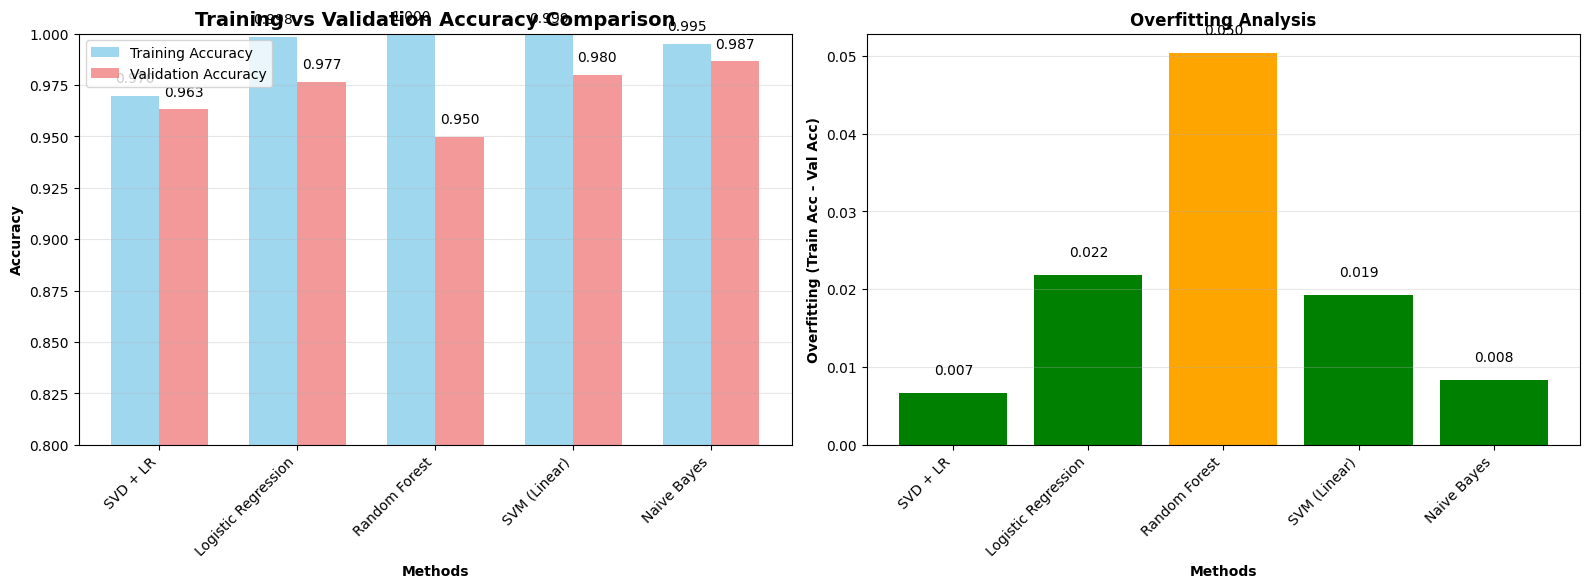

In [53]:
print(f"\nSTEP 3: VISUALIZATION OF RESULTS")

# Prepare data for plotting
methods = ['SVD + LR'] + list(supervised_results.keys())
train_accs = [matrix_fact_result['train_accuracy']] + [r['train_accuracy'] for r in supervised_results.values()]
val_accs = [matrix_fact_result['val_accuracy']] + [r['val_accuracy'] for r in supervised_results.values()]

# Create comparison plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Training vs Validation Accuracy
x_pos = np.arange(len(methods))
width = 0.35

axes[0].bar(x_pos - width/2, train_accs, width, label='Training Accuracy', alpha=0.8, color='skyblue')
axes[0].bar(x_pos + width/2, val_accs, width, label='Validation Accuracy', alpha=0.8, color='lightcoral')

axes[0].set_xlabel('Methods', fontweight='bold')
axes[0].set_ylabel('Accuracy', fontweight='bold')
axes[0].set_title('Training vs Validation Accuracy Comparison', fontweight='bold', fontsize=14)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(methods, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim(0.8, 1.0)

# Add value labels on bars
for i, (train_acc, val_acc) in enumerate(zip(train_accs, val_accs)):
    axes[0].text(i - width/2, train_acc + 0.005, f'{train_acc:.3f}', ha='center', va='bottom')
    axes[0].text(i + width/2, val_acc + 0.005, f'{val_acc:.3f}', ha='center', va='bottom')

# Plot 2: Overfitting Analysis (Train - Validation gap)
overfitting = [train - val for train, val in zip(train_accs, val_accs)]
bars = axes[1].bar(methods, overfitting, color=['green' if x < 0.05 else 'orange' if x < 0.1 else 'red' for x in overfitting])

axes[1].set_xlabel('Methods', fontweight='bold')
axes[1].set_ylabel('Overfitting (Train Acc - Val Acc)', fontweight='bold')
axes[1].set_title('Overfitting Analysis', fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(methods, rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars, overfitting):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
                 f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## 4. Data Efficiency Analysis

In [54]:
print(f"\nSTEP 4: DATA EFFICIENCY ANALYSIS")
print("Testing performance with different amounts of training data...")

# Test with different percentages of training data
data_fractions = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0]
efficiency_results = {method: {'fractions': [], 'train_accs': [], 'val_accs': []}
                     for method in ['SVD + LR', 'Logistic Regression', 'Random Forest']}

for fraction in data_fractions:
    print(f"\n--- Testing with {fraction*100:.0f}% of training data ---")

    # Calculate number of samples
    n_samples = int(train_features.shape[0] * fraction)

    # Sample data (stratified)
    if fraction < 1.0:
        # Use train_size instead of a direct fraction for train_test_split
        X_sample, _, y_sample, _ = train_test_split(
            train_features, train_labels, train_size=n_samples,
            random_state=42, stratify=train_labels
        )
    else:
        X_sample, y_sample = train_features, train_labels


    print(f"Using {X_sample.shape[0]} training samples")


    # Test Matrix Factorization approach
    # Apply SVD to the sample
    sample_svd = TruncatedSVD(n_components=30, random_state=42)
    # Ensure X_sample is dense for SVD if it's not already (TruncatedSVD can handle sparse, but sometimes explicit is safer)
    # sample_svd_features = sample_svd.fit_transform(X_sample.toarray() if hasattr(X_sample, 'toarray') else X_sample)
    sample_svd_features = sample_svd.fit_transform(X_sample)


    svd_clf = LogisticRegression(random_state=42, max_iter=1000)
    svd_clf.fit(sample_svd_features, y_sample)

    # Predict on validation set (need to transform validation set with same SVD)
    # Ensure X_val is dense if necessary
    # val_svd_features = sample_svd.transform(X_val.toarray() if hasattr(X_val, 'toarray') else X_val)
    val_svd_features = sample_svd.transform(X_val)


    svd_sample_train_pred = svd_clf.predict(sample_svd_features)
    svd_sample_val_pred = svd_clf.predict(val_svd_features)

    svd_sample_train_acc = accuracy_score(y_sample, svd_sample_train_pred)
    svd_sample_val_acc = accuracy_score(y_val, svd_sample_val_pred)

    efficiency_results['SVD + LR']['fractions'].append(fraction)
    efficiency_results['SVD + LR']['train_accs'].append(svd_sample_train_acc)
    efficiency_results['SVD + LR']['val_accs'].append(svd_sample_val_acc)

    print(f"SVD + LR: Train {svd_sample_train_acc:.4f}, Val {svd_sample_val_acc:.4f}")

    # Test Supervised approaches
    for model_name in ['Logistic Regression', 'Random Forest']:
        classification_model = supervised_models[model_name]

        # Train on sample
        classification_model.fit(X_sample, y_sample)

        # Predict
        sup_train_pred = classification_model.predict(X_sample)
        sup_val_pred = classification_model.predict(X_val)

        sup_train_acc = accuracy_score(y_sample, sup_train_pred)
        sup_val_acc = accuracy_score(y_val, sup_val_pred)

        efficiency_results[model_name]['fractions'].append(fraction)
        efficiency_results[model_name]['train_accs'].append(sup_train_acc)
        efficiency_results[model_name]['val_accs'].append(sup_val_acc)

        print(f"{model_name}: Train {sup_train_acc:.4f}, Val {sup_val_acc:.4f}")


STEP 4: DATA EFFICIENCY ANALYSIS
Testing performance with different amounts of training data...

--- Testing with 10% of training data ---
Using 119 training samples
SVD + LR: Train 0.9916, Val 0.8960
Logistic Regression: Train 1.0000, Val 0.9597
Random Forest: Train 1.0000, Val 0.8758

--- Testing with 20% of training data ---
Using 238 training samples
SVD + LR: Train 0.9622, Val 0.9295
Logistic Regression: Train 1.0000, Val 0.9664
Random Forest: Train 1.0000, Val 0.9094

--- Testing with 30% of training data ---
Using 357 training samples
SVD + LR: Train 0.9636, Val 0.9430
Logistic Regression: Train 1.0000, Val 0.9732
Random Forest: Train 1.0000, Val 0.9262

--- Testing with 50% of training data ---
Using 596 training samples
SVD + LR: Train 0.9664, Val 0.9564
Logistic Regression: Train 0.9983, Val 0.9698
Random Forest: Train 1.0000, Val 0.9463

--- Testing with 70% of training data ---
Using 834 training samples
SVD + LR: Train 0.9712, Val 0.9597
Logistic Regression: Train 0.9988,

## 5. Data Efficiency Visualization


STEP 5: DATA EFFICIENCY VISUALIZATION


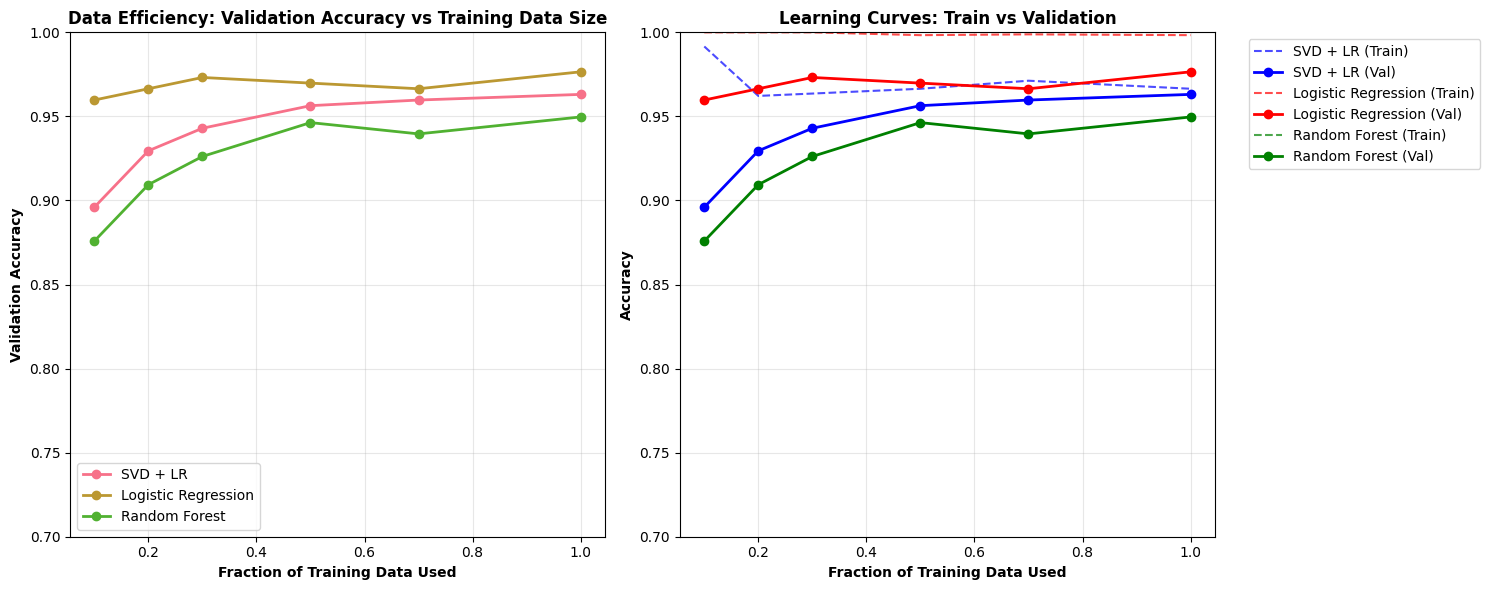

In [55]:
print(f"\nSTEP 5: DATA EFFICIENCY VISUALIZATION")

plt.figure(figsize=(15, 6))

# Plot validation accuracy vs data fraction
plt.subplot(1, 2, 1)
for method, results in efficiency_results.items():
    plt.plot(results['fractions'], results['val_accs'],
             marker='o', linewidth=2, markersize=6, label=method)

plt.xlabel('Fraction of Training Data Used', fontweight='bold')
plt.ylabel('Validation Accuracy', fontweight='bold')
plt.title('Data Efficiency: Validation Accuracy vs Training Data Size', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.7, 1.0)

# Plot learning curves (train vs val for each method)
plt.subplot(1, 2, 2)
colors = ['blue', 'red', 'green']
for i, (method, results) in enumerate(efficiency_results.items()):
    plt.plot(results['fractions'], results['train_accs'],
             '--', color=colors[i], alpha=0.7, label=f'{method} (Train)')
    plt.plot(results['fractions'], results['val_accs'],
             '-', color=colors[i], linewidth=2, marker='o', label=f'{method} (Val)')


plt.xlabel('Fraction of Training Data Used', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Learning Curves: Train vs Validation', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(0.7, 1.0)


plt.tight_layout()
plt.show()

## 6. Analysis and Conclusions

In [56]:
print("----------------------------------------------------------------------")
print("DATA EFFICIENCY & COMPARISON ANALYSIS")
print("----------------------------------------------------------------------")

# Find which method is most data-efficient
print(f"\nDATA EFFICIENCY RANKING:")
print("(Based on validation accuracy with 50% of training data)")
print("----------------------------------------------------------------------")

half_data_results = []
for method, results in efficiency_results.items():
    if 0.5 in results['fractions']:
      idx_50 = results['fractions'].index(0.5)
      val_acc_50 = results['val_accs'][idx_50]
      half_data_results.append((method, val_acc_50))
    else:
      print(f"Warning: Fraction 0.5 not found for {method}")


# Sort by accuracy
half_data_results.sort(key=lambda x: x[1], reverse=True)

for i, (method, acc) in enumerate(half_data_results, 1):
    print(f"{i}. {method}: {acc:.4f}")

print(f"\nOVERALL COMPARISON SUMMARY:")
# Ensure max(val_accs) is calculated from the actual val_accs list used in plotting
# (which includes SVD+LR)
all_val_accs = [matrix_fact_result['val_accuracy']] + [r['val_accuracy'] for r in supervised_results.values()]
best_method_index = np.argmax(all_val_accs)
print(f"• Best Overall Performance: {methods[best_method_index]} ({max(all_val_accs):.4f} validation accuracy)")


print(f"• Most Data-Efficient: {half_data_results[0][0]} ({half_data_results[0][1]:.4f} with 50% data)")

# Recalculate overfitting using the lists that include SVD+LR
all_overfitting = [train - val for train, val in zip(train_accs, all_val_accs)]
least_overfitting_index = np.argmin(all_overfitting)
print(f"• Least Overfitting: {methods[least_overfitting_index]} ({min(all_overfitting):.4f} gap)")


print(f"\nKEY INSIGHTS:")
print(f"• Matrix factorization (SVD) achieved {matrix_fact_result['val_accuracy']:.4f} validation accuracy")
print(f"• Dimensionality Reduction: 5000 → 30 features (99.4% reduction)")
print(f"• Computational efficiency: SVD trains on reduced feature space")

# Determine which approaches work best with limited data
print(f"\nDATA EFFICIENCY INSIGHTS:")
# Check performance at a lower fraction, e.g., 20% (index 1 in data_fractions)
if efficiency_results['SVD + LR']['val_accs'][1] > max([efficiency_results[m]['val_accs'][1] for m in ['Logistic Regression', 'Random Forest']]):
    print("Matrix factorization shows superior performance with limited data (at 20% fraction)")
else:
    print("Supervised learning maintains advantage even with limited data (at 20% fraction)")


print(f"\n note :")
print("----------------------------------------------------------------------")
print("• For limited data: Use the most data-efficient approach identified above")
print("• For production: Consider ensemble of best-performing methods")
print("• For interpretability: Matrix factorization provides topic-based insights")
print("• For speed: SVD approach reduces computational complexity")




DATA EFFICIENCY & COMPARISON ANALYSIS

DATA EFFICIENCY RANKING:
(Based on validation accuracy with 50% of training data)
1. Logistic Regression: 0.9698
2. SVD + LR: 0.9564
3. Random Forest: 0.9463

OVERALL COMPARISON SUMMARY:
• Best Overall Performance: Naive Bayes (0.9866 validation accuracy)
• Most Data-Efficient: Logistic Regression (0.9698 with 50% data)
• Least Overfitting: SVD + LR (0.0067 gap)

KEY INSIGHTS:
• Matrix factorization (SVD) achieved 0.9631 validation accuracy
• Dimensionality Reduction: 5000 → 30 features (99.4% reduction)
• Computational efficiency: SVD trains on reduced feature space

DATA EFFICIENCY INSIGHTS:
Supervised learning maintains advantage even with limited data (at 20% fraction)

NOTES:
• For limited data: Use the most data-efficient approach identified above
• For production: Consider ensemble of best-performing methods
• For interpretability: Matrix factorization provides topic-based insights
• For speed: SVD approach reduces computational complexity

#**Part 2**
---

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load CSV files from Colab local file tree
MV_users = pd.read_csv('users.csv')
MV_movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("All CSV files loaded successfully!")

# Print basic stats
print("\nSplitting ratings data into train and test sets...")
train, test_split = train_test_split(ratings, test_size=0.2, random_state=42)

print(f"Training set size: {len(train)}")
print(f"Test set size: {len(test_split)}")

# Show preview of loaded data
print("\nUsers sample:")
display(MV_users.head())

print("\nMovies sample:")
display(MV_movies.head())

print("\nRatings sample:")
display(ratings.head())


All CSV files loaded successfully!

Splitting ratings data into train and test sets...
Training set size: 560116
Test set size: 140030

Users sample:


,uID,gender,age,accupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455



Movies sample:


,mID,title,year,Doc,Com,Hor,Adv,Wes,Dra,Ani,...,Chi,Cri,Thr,Sci,Mys,Rom,Fil,Fan,Act,Mus
0,1,Toy Story,1995,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,Grumpier Old Men,1995,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Ratings sample:


,uID,mID,rating
0,744,1210,5
1,3040,1584,4
2,1451,1293,5
3,5455,3176,2
4,2507,3074,5


In [60]:
print("Pivoting training data into a user-item matrix...")

R_df = train.pivot(
    index='uID',
    columns='mID',
    values='rating'
).fillna(0)

R = R_df.to_numpy()

print("User-item matrix created successfully.")
print(f"Shape of matrix: {R.shape}")

from sklearn.decomposition import NMF

n_components = 20  # <--- tune hype
classification_model = NMF(n_components=n_components, init='random', random_state=42, max_iter=1000)
W = classification_model.fit_transform(R)
H = classification_model.components_

R_reconstructed = W @ H

print(f"\nNMF applied with {n_components} components.")
print(f"Shape of W (User features): {W.shape}")
print(f"Shape of H (Movie features): {H.shape}")
print(f"Shape of R_reconstructed: {R_reconstructed.shape}")


Pivoting training data into a user-item matrix...
User-item matrix created successfully.
Shape of matrix: (6040, 3637)


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(



NMF applied with 20 components.
Shape of W (User features): (6040, 20)
Shape of H (Movie features): (20, 3637)
Shape of R_reconstructed: (6040, 3637)


In [63]:
from sklearn.metrics import mean_squared_error

print("\nMaking predictions for the test set...")
predictions = []
actuals = []

# Loop through the test data to get predictions
for index, row in test.iterrows():
    user_id = int(row['uID'])
    movie_id = int(row['mID'])
    actual_rating = row['rating']

    # Check if the user/movie from the test set existed in the training matrix
    if user_id in R_df.index and movie_id in R_df.columns:
        # Get the matrix indices for this user and movie
        user_idx = R_df.index.get_loc(user_id)
        movie_idx = R_df.columns.get_loc(movie_id)

        # Look up the predicted rating in our reconstructed matrix
        predicted_rating = R_reconstructed[user_idx, movie_idx]

        # Optional: Clip predictions to the valid rating range (1 to 5)
        predicted_rating = max(1, min(5, predicted_rating))

        predictions.append(predicted_rating)
        actuals.append(actual_rating)
    else:
        pass  # Skip test samples with unknown user/movie

print("----------------------------------------------------------------------")

# RMSE
if len(actuals) > 0:
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    print(f"\nRoot Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"number of test points evaluated: {len(actuals)}")
else:
    print("\n ! No predictions could be made for the test set (users/movies not in training data).")



Making predictions for the test set...
----------------------------------------------------------------------

Root Mean Squared Error (RMSE): 2.6479
number of test points evaluated: 299999


## Discussion for Part 2: NMF Limitations

An RMSE of **2.6479** is high, indicating that the model's predictions are often inaccurate. This poor performance is expected and highlights the limitations of using a general-purpose library like sklearn.NMF for a specialized collaborative filtering task. Using libraries like suprise could help fix this.

### Limitations of sklearn.NMF for Recommendations

- The biggest flaw is that sklearn.NMF cannot process missing ratings (NaNs). We were forced to fill them with zeros, which incorrectly teaches the model that a user not rating an item is the same as giving it a 0-star review. This heavily biases the model.

- The model works to minimize reconstruction error across the *entire* matrix, including the thousands of zeros we added. A proper recommendation algorithm should only focus on minimizing the error on the ratings that users actually provided.